# Definição

A convolução é a operação (representada por *) entre duas funções que resulta em uma terceira função:

- f(x) e g(x) quando operados resultam em um h(x) -> h(x) = (f * g)(x)

- É o somatório do produto entre duas funções, sendo uma delas invertida e deslocada.
    - f(x) -> são os dados
    - g(x) -> é um filtro (kernel)

        - O filtro é invertido e deslocado ao longo da função f(x)

# Convolução em 1 dimensão (1D)

A convolução é o somatório do produto entre funções, sendo uma delas invertida e deslocada. A convolução 1D indica que esta função será deslocada em apenas uma dimensão.

Vamos assumir o seguinte problema:

- Você decidiu coletar dados do acelerômetro de um celular. O objetivo é fazer com que pessoas caminhem com o celular no bolso para analisar como o sensor responde a esse movimento. A magnitude no sinal do acelerômetro se altera como uma espécie de **senóide ruidosa**.
- A seguir, vamos simular um dado semelhante e supor que queremos **localizar os intervalos crescentes nesse sinal**.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import convolve

### Simulação do sinal senóide ruidoso

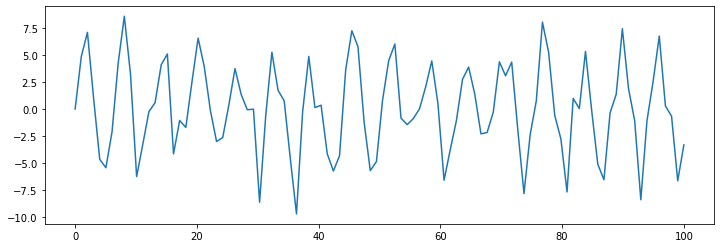

In [5]:
x = np.linspace(0, 100, 100) # eixo x entre 0 e 100 com 100 valores
y = 10 * np.sin(x) * np.random.rand(x.shape[0]) # senóide multiplicada por algum ruído aleatório

plt.figure(figsize=(12,4))
plt.plot(x, y)

### Função que exibe o sinal 1D como imagem em valores

In [6]:
def exibe(valores, titulo):
    plt.figure(figsize=(len(valores), 2))
    plt.imshow(valores[np.newaxis, :], cmap='gray')
    for k, s in enumerate(valores):
        plt.text(k, 0, '{:.1f}'.format(s), fontsize=16, color='red', ha='center', va='center')
    plt.title(titulo, fontsize=18)
    plt.yticks([])

### Representação 1D

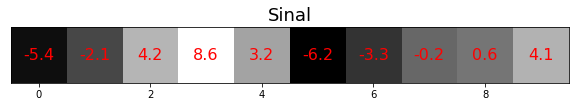

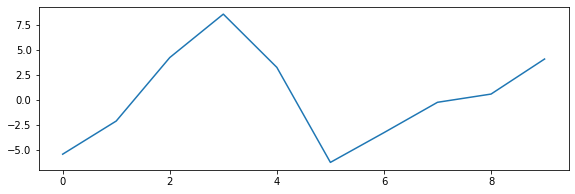

In [11]:
# trecho do sinal
sinal = y[5:15]

exibe(sinal, 'Sinal')

plt.figure(figsize=(9.5,3))
plt.plot(sinal)

Como queremos encontrar intervalos crescentes, devemos criar um kernel (filtro) com esse mesmo padrão.

Porém, a convolução opera funções após **inverter o kernel**, então devemos criar um filtro com intrevalo decrescente:

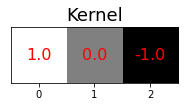

In [17]:
kernel = [1, 0, -1]
kernel = np.asarray(kernel)

exibe(kernel, 'Kernel')

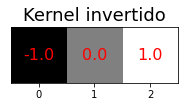

In [18]:
kernel_invertido = np.flip(kernel)

exibe(kernel_invertido, 'Kernel invertido')

Agora, vamos imprimir o kernel deslocando-o ao longo do sinal para entender passo a passo da operação.

Para gerar a visualização de cada deslocamento, usaremos a seguinte gambi:

In [21]:
# alteramos o valor de u para controlar o deslocamento

def desloca_kernel(u):
    deslocamento = [float('nan')] * u

    kernel_deslocado = np.hstack((deslocamento, kernel_invertido))

    exibe(kernel_deslocado, 'Kernel deslocado')
    exibe(sinal, "Sinal")

A operação é feita ponto a ponto:
- Posição n do kernel com posição n do sinal.

Deslocamento 0:

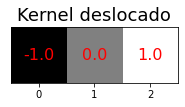

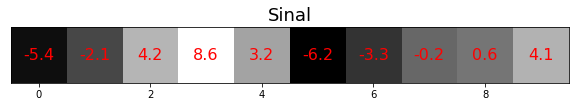

In [22]:
desloca_kernel(0)

    -1.0 x -5.4 = 5.4
    0.0 x -2.1 = 0.0
    1.0 x 4.2 = 4.2
    
    Sinal resultante: 9.6

Deslocamento 1:

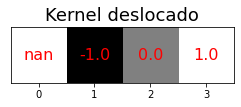

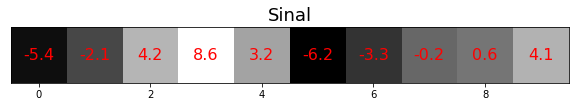

In [23]:
desloca_kernel(1)

    -1.0 x -2.1 = 2.1
    0.0 x 4.2 = 0.0
    1.0 x 8.6 = 8.6

    Sinal resultante: 10.7

O processo é repetido até o final gerando um sinal resultante pixel a pixel:
- 9.6 , 10.7 ,  ...

Para não precisar fazer isso na mão, utilizamos a função convolve:

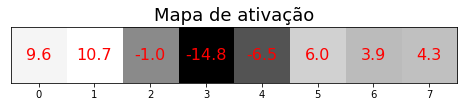

In [26]:
ativacao = convolve(sinal, kernel, mode='valid')

exibe(ativacao, 'Mapa de ativação')

Nos pontos de maior ativação, foram encontrados os intervalos crescentes mais significativos, **representados pela cor mais clara**.

No exemplo é o pixel com valor 10.7, que é o pixel de número 1 no trecho do sinal.

Na sequencia, temos o pixel com valor 9.6, que representa o pixel 0 no trecho.

Por fim, temos o pixel com valor 6.0, que representa o pixel de valor 5 no trecho.

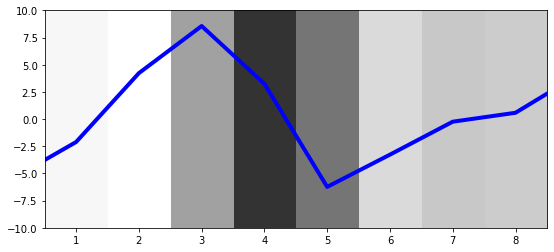

In [35]:
plt.figure(figsize=(9,4))
plt.plot(sinal, color='blue', linewidth=4)
plt.imshow(ativacao[np.newaxis, :], cmap='gray', aspect='auto', alpha=0.8, extent=(0.5, 8.5, -10, 10))

## Rodando a convolução para o sinal completo:

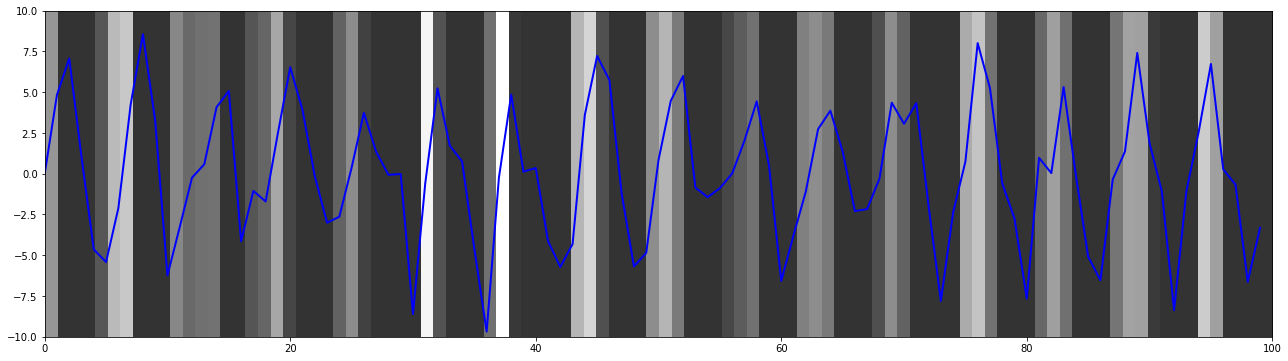

In [46]:
sinal = y

ativacao = convolve(sinal, kernel, mode='valid')

ativacao[ativacao < 0] = 0 # se for decrescente, iguala a 0

plt.figure(figsize=(22,6))
plt.plot(sinal, color='blue', linewidth=2)
plt.imshow(ativacao[np.newaxis, :], cmap='gray', aspect='auto', alpha=0.8, extent=(0, 100, -10, 10))

Os intervalos com cor mais clara representam pontos crescentes do sinal.

Um kernel de convolução 1D, ao operar ao longo do sinal de entrada (que também deve ser 1D), é capaz de identificar o padrão para o qual foi projetado em diferentes pontos do sinal. Essa operação pode ser explorada na forma de uma Rede Neural Convolucional (CNN) 1D. O benefício disso é a identificação de padrões cada vez mais complexos, que podem ser encontrados através de uma composição hierárquica de camadas de convolução.